# **Package LAB**

# Importation des bibliothèques

In [1085]:
import numpy as np
import PACKAGE_LAB

import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
from importlib import reload
PACKAGE_LAB = reload(PACKAGE_LAB)

from PACKAGE_LAB import *
from package_DBR import SelectPath_RT, Delay_RT, Process


# ⚠️ Partie originalité: installation pour télécharger dash

In [1087]:
#!!!!  ATTENTION Télécharger dash

import dash
from dash import dcc, html
import plotly.graph_objects as go
from dash.dependencies import Input, Output
from plotly.subplots import make_subplots
from ipywidgets import interactive, VBox


# 🛠️ ÉTAPE 1 : Fonction Lead-Lag

In [1089]:
help(LL_RT)

Help on function LL_RT in module PACKAGE_LAB:

LL_RT(MV, Kp, TLead, TLag, Ts, PV, PVInit=0, method='EBD')
    The function "LL_RT" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :MV: input vector (manipulated variable)
    :Kp: process gain
    :TLead: lead time constant [s]
    :TLag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector (process variable) — the simulated response is appended to this list
    :PVInit: initial value for the process variable if PV is empty (optional, default = 0)
    :method: discretisation method (optional, default = 'EBD')
        EBD: Euler Backward Difference
        EFD: Euler Forward Difference
        TRAP: Trapezoidal (Tustin) method
        others: basic approximation without lead compensation
    
    :return: simulated LL output vector (appended to PV)



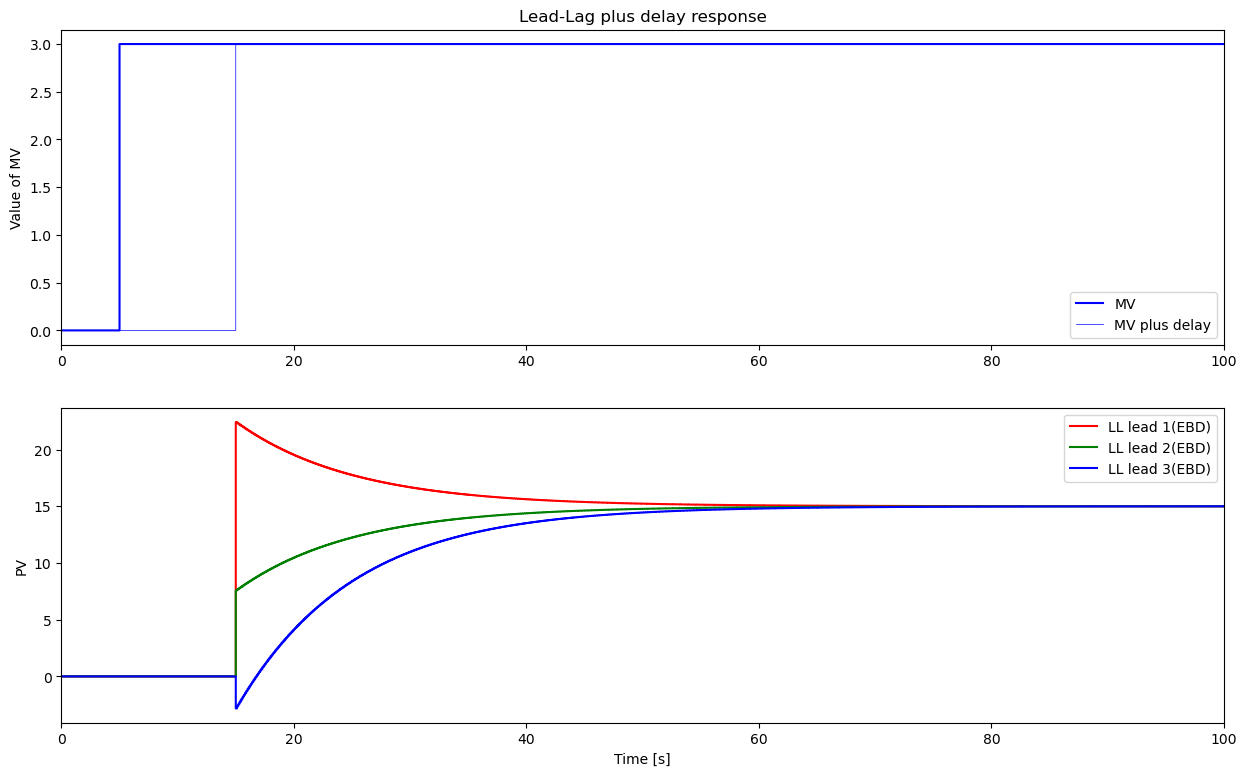

In [1090]:
TSim = 100
Ts = 0.1
N = int(TSim / Ts) + 1
theta = 5
Kp = 5

Tlead_1 = 15
Tlead_2 = 5
Tlead_3 = -2
Tlag = 10
theta = 10

global MVFF
MVPath = {0: 0, 5:3, TSim: 3}
t = []
MV = []
PV = []
MVDelay = []
PV_EBD_1 = []
PV_EBD_LEAD1 = []
PV_EBD_LEAD2 = []
PV_EBD_LEAD3 = []

for i in range(0, N):
    t.append(i * Ts)
    SelectPath_RT(MVPath, t, MV)
    Delay_RT(MV, theta, Ts, MVDelay)
    LL_RT(MVDelay, Kp, Tlead_1, Tlag, Ts, PV_EBD_LEAD1)
    LL_RT(MVDelay, Kp, Tlead_2, Tlag, Ts, PV_EBD_LEAD2)
    LL_RT(MVDelay, Kp, Tlead_3, Tlag, Ts, PV_EBD_LEAD3)

plt.figure(figsize=(15, 9))

plt.subplot(2, 1, 1)
plt.step(t, MV, 'b-', label='MV', where='post')
plt.step(t, MVDelay, 'b-', linewidth=0.5, label='MV plus delay', where='post')
plt.ylabel('Value of MV')
plt.title('Lead-Lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2, 1, 2)
plt.step(t, PV_EBD_LEAD1, 'r-', label='LL lead 1(EBD)', where='post')
plt.step(t, PV_EBD_LEAD2, 'g-', label='LL lead 2(EBD)', where='post')
plt.step(t, PV_EBD_LEAD3, 'b-', label='LL lead 3(EBD)', where='post')

plt.ylabel('PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.show()

# 🛠️ ÉTAPE 2 : Fonction PID

In [1092]:
help(PID_RT)

Help on function PID_RT in module PACKAGE_LAB:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVMin, MVMax, MV, MVP, MVI, MVD, E, ManFF=False, PVInit=0, methodI='EBD', methodD='EBD')
    The function "PID_RT" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :SP: setpoint vector
    :PV: process variable vector (measured output)
    :Man: list of boolean flags indicating manual mode at each step
    :MVMan: manual mode control signal vector
    :MVFF: feedforward signal vector
    :Kc: proportional gain
    :Ti: integral time constant [s]
    :Td: derivative time constant [s]
    :alpha: derivative filter coefficient (Tfd = alpha * Td)
    :Ts: sampling period [s]
    :MVMin: minimum limit for control signal (saturation)
    :MVMax: maximum limit for control signal (saturation)
    :MV: output vector (final manipulated variable, result is appended)
    :MVP: proportional term vector
    :MVI: integral term vector
    :MVD: derivati

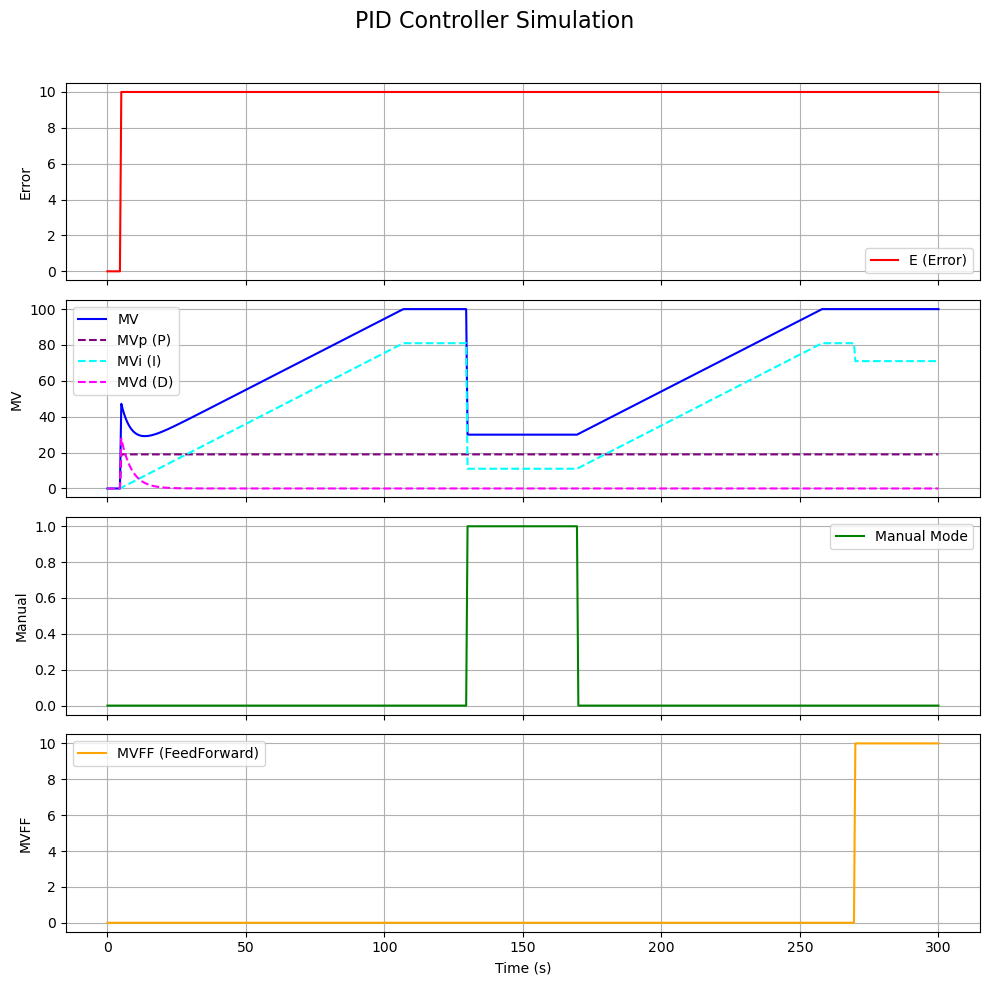

In [1093]:

Kc = 1.9
TD = 6
TI = 24
alpha = 0.6


TSim = 300
Ts = 0.5
N = int(TSim / Ts) + 1

t = []
SP = []
PV = []
Man = []
MVMan = []
MVFF = []
MV = []
MVp = []
MVi = []
MVd = []
E = []


MVmin = 0
MVmax = 100


ManPath = {0: False, 130: True, 170: False}
MVManPath = {0: 30}
SPPath = {0: 50, 5: 60}
PVpath = {0: 50}
MVFFPath = {0: 0, 270: 10, TSim: 10}


for i in range(0, N):
    t.append(i * Ts)
    SelectPath_RT(SPPath, t, SP)
    SelectPath_RT(PVpath, t, PV)
    SelectPath_RT(ManPath, t, Man)
    SelectPath_RT(MVManPath, t, MVMan)
    SelectPath_RT(MVFFPath, t, MVFF)

for i in range(0, N):
    PID_RT(SP[0:i+1], PV[0:i+1], Man[0:i+1], MVMan[0:i+1], MVFF[0:i+1],
           Kc, TI, TD, alpha, Ts, MVmin, MVmax,
           MV, MVp, MVi, MVd, E, ManFF=True)


fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
fig.suptitle('PID Controller Simulation', fontsize=16)


axs[0].plot(t, E, color='red', label='E (Error)')
axs[0].set_ylabel('Error')
#axs[0].set_ylim(-5, 5)
axs[0].legend()
axs[0].grid(True)


axs[1].plot(t, MV, label='MV', color='blue')
axs[1].plot(t, MVp, label='MVp (P)', linestyle='--', color='purple')
axs[1].plot(t, MVi, label='MVi (I)', linestyle='--', color='cyan')
axs[1].plot(t, MVd, label='MVd (D)', linestyle='--', color='magenta')
axs[1].set_ylabel('MV')
axs[1].legend()
axs[1].grid(True)


axs[2].plot(t, Man, label='Manual Mode', color='green')
axs[2].set_ylabel('Manual')
axs[2].legend()
axs[2].grid(True)


axs[3].plot(t, MVFF, label='MVFF (FeedForward)', color='orange')
axs[3].set_ylabel('MVFF')
axs[3].set_xlabel('Time (s)')
axs[3].legend()
axs[3].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 🛠️ ÉTAPE 3 : IMC_TUNING

In [1095]:
help(IMC_Tuning)

Help on function IMC_Tuning in module PACKAGE_LAB:

IMC_Tuning(Kp, theta, T, T2=0, gamma=0.2, order=1)
    The function "IMC_Tuning" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :Kp: process gain
    :theta: process dead time [s]
    :T: main time constant [s]
    :T2: second time constant (optional, default = 0) [s]
    :gamma: closed-loop aggressiveness factor (Tclp = gamma * T), default = 0.2
    :order: process order (1 for FOPDT, 2 for SOPDT), default = 1
    
    :return: PID tuning parameters (Kc, Ti, Td)
    
    The function "IMC_Tuning" returns the simulated PID tuning parameters from the input parameters using the Internal Model Control (IMC) method.



In [1096]:
# # === Paramètres du modèle FOPDT pour le tuning IMC ===
# Kp_model = 0.5280686804191848
# T_model = 160.98841281582534
# theta_model = 35.21872295460488
# gamma = 0.4  # agressivité de la boucle

# # Tuning PID via IMC
# Kc, TI, TD = IMC_Tuning(Kp=Kp_model, theta=theta_model, T=T_model, gamma=gamma, order=1)
# alpha = 0.6  # filtre dérivé

# # Affichage des valeurs de réglage
# print(f"Tuning IMC : Kc = {Kc:.3f}, Ti = {TI:.3f}, Td = {TD:.3f}")

# # === Simulation PID ===
# TSim = 300
# Ts = 0.5
# N = int(TSim / Ts) + 1

# t = []
# SP = []
# PV = []
# Man = []
# MVMan = []
# MVFF = []
# MV = []
# MVp = []
# MVi = []
# MVd = []
# E = []

# MVmin = 0
# MVmax = 100

# # Signaux (chemins temporels)
# ManPath = {0: False, 130: True, 170: False}
# MVManPath = {0: 30}
# SPPath = {0: 50, 5: 60}
# PVpath = {0: 50}
# MVFFPath = {0: 0, 270: 10, TSim: 10}

# # Génération des signaux à chaque pas
# for i in range(0, N):
#     t.append(i * Ts)
#     SelectPath_RT(SPPath, t, SP)
#     SelectPath_RT(PVpath, t, PV)
#     SelectPath_RT(ManPath, t, Man)
#     SelectPath_RT(MVManPath, t, MVMan)
#     SelectPath_RT(MVFFPath, t, MVFF)

# # Boucle PID
# for i in range(0, N):
#     PID_RT(SP[0:i+1], PV[0:i+1], Man[0:i+1], MVMan[0:i+1], MVFF[0:i+1],
#            Kc, TI, TD, alpha, Ts, MVmin, MVmax,
#            MV, MVp, MVi, MVd, E, ManFF=True)

# # Affichage des résultats
# fig, axs = plt.subplots(4, 1, figsize=(10, 10), sharex=True)
# fig.suptitle('PID Controller Simulation with IMC Tuning', fontsize=16)

# axs[0].plot(t, E, color='red', label='E (Error)')
# axs[0].set_ylabel('Error')
# axs[0].legend()
# axs[0].grid(True)

# axs[1].plot(t, MV, label='MV', color='blue')
# axs[1].plot(t, MVp, label='MVp (P)', linestyle='--', color='purple')
# axs[1].plot(t, MVi, label='MVi (I)', linestyle='--', color='cyan')
# axs[1].plot(t, MVd, label='MVd (D)', linestyle='--', color='magenta')
# axs[1].set_ylabel('MV')
# axs[1].legend()
# axs[1].grid(True)

# axs[2].plot(t, Man, label='Manual Mode', color='green')
# axs[2].set_ylabel('Manual')
# axs[2].legend()
# axs[2].grid(True)

# axs[3].plot(t, MVFF, label='MVFF (FeedForward)', color='orange')
# axs[3].set_ylabel('MVFF')
# axs[3].set_xlabel('Time (s)')
# axs[3].legend()
# axs[3].grid(True)

# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()


In [1097]:
# 1er ordre 

Kp = 0.5280686804191848
T =  160.98841281582534
theta = 35.21872295460488
Kc,Ti,Td = IMC_Tuning(Kp,theta,T,gamma = 0.4)
print(f"Kc: {Kc:.3f}, Ti: {Ti:.3f}, Td: {Td:.12f}")
#  pour les caractéristiques optimal 6.790392279065642 178.59777429312777 15.873115810940655





4.124266750259383 178.59777429312777 15.873115810940655
Kc: 4.124, Ti: 178.598, Td: 15.873115810941


# 🛠️ ÉTAPE 4 : Margin 

In [1099]:
help(margin)

Help on function margin in module PACKAGE_LAB:

margin(P: package_DBR.Process, C: PACKAGE_LAB.Controller, omega, show=True)
    The function "margin" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :P: instance of the Process class, containing process parameters
    :C: instance of the Controller class, containing controller parameters
    :omega: array of frequency values [rad/s]
    :show: (optional, default = True) if True, displays the Bode plot with gain and phase margins
    
    :return: if show=False, returns a tuple (Ls, GM, PM)
        - Ls: loop transfer function evaluated over omega
        - GM: gain margin [dB]
        - PM: phase margin [°]
    
    The function "margin" returns the gain margin, phase margin, and optionally the loop transfer function from the given process and controller parameters.



Gain margin GM = 8.69868 dB at 0.05 rad/s
Phase margin PM = 76.05111° at 0.01 rad/s


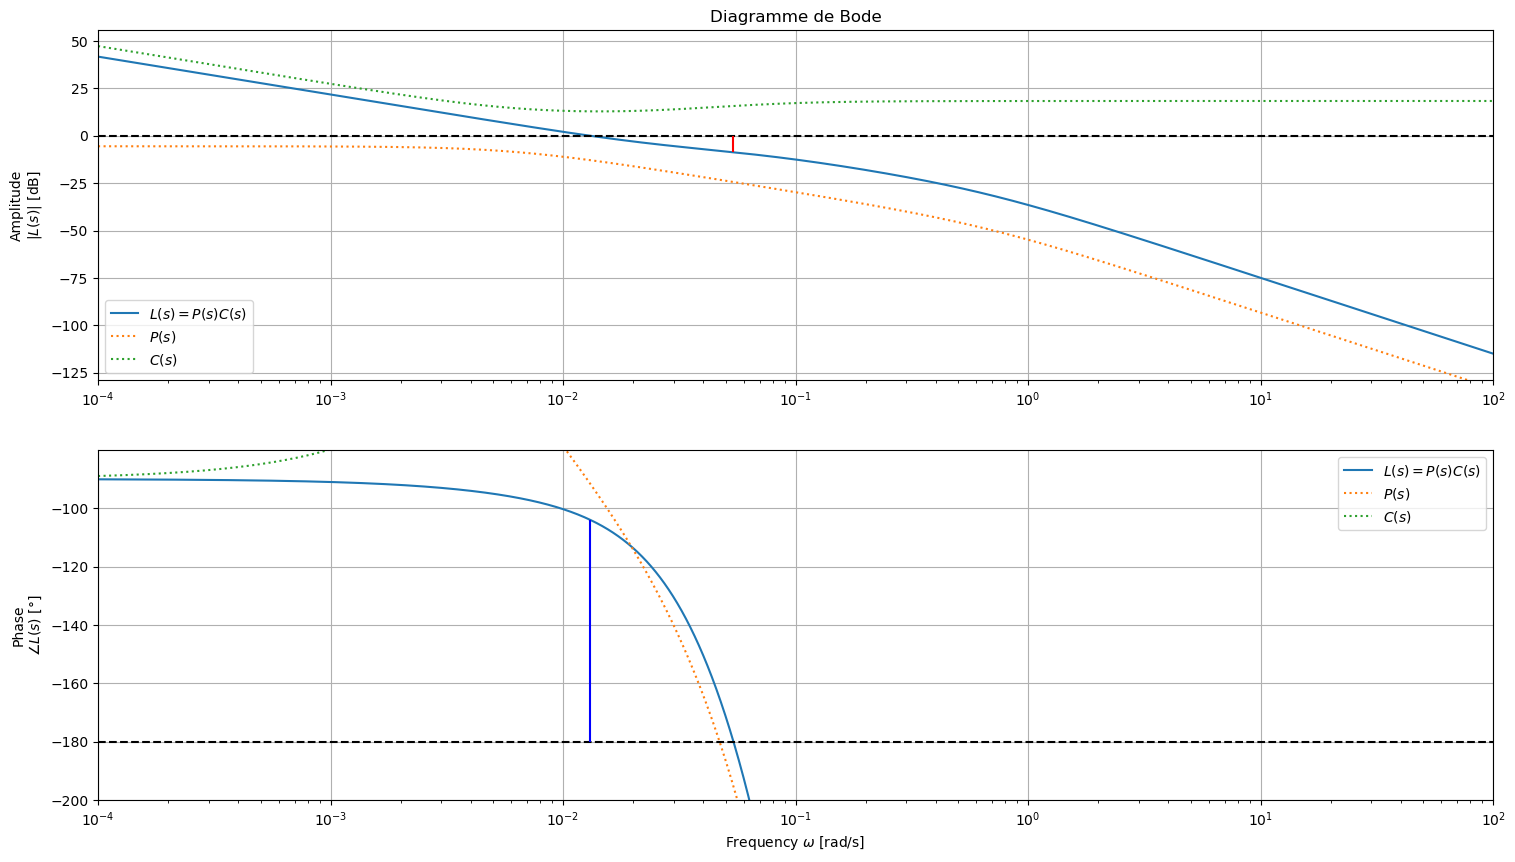

In [1100]:
# Second ordre

Kp_OMV_SOPDT = 0.5279783321046589
T1_OMV_SOPDT = 160.37049931289846
T2_OMV_SOPDT = 1.5102440400334622 
theta_OMV_SOPDT = 34.601306808660546

P = Process({'Kp' : Kp_OMV_SOPDT, 'Tlag1' :T1_OMV_SOPDT, 'Tlag2' : T2_OMV_SOPDT, 'theta' : theta_OMV_SOPDT})

alpha = 1
C = Controller({'Kc' : Kc, 'Ti' : Ti, 'Td' : Td, 'Tfd' : alpha*Td})

omega = np.logspace(-4, 2, 10000)

margin(P, C, omega)

# 💡 Originalité : Interface Dash : Fonction Lead-Lag

In [1102]:
# # Lead lag

# TSim = 100
# Ts = 0.5
# N = int(TSim / Ts) + 1
# theta = 5

# MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

# t = []
# MV = []
# MVDelay = []
# PV_EBD_1 = []
# PV_EFD_1 = []
# PV_TRP_1 = []  # ➕ Liste pour méthode trapézoïdale

# for i in range(0, N):
#     t.append(i * Ts)
#     SelectPath_RT(MVPath, t, MV)
#     Delay_RT(MV, theta, Ts, MVDelay)

# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Simulation du système Lead-Lag"),
    
#     dcc.Graph(id='mv-graph'),
#     dcc.Graph(id='pv-graph'),
    
#     html.Label("TLead"),
#     dcc.Slider(id='TLead', min=-10, max=50, step=1, value=-5, marks={i: str(i) for i in range(-10, 51, 10)}),
    
#     html.Label("TLag"),
#     dcc.Slider(id='TLag', min=0, max=50, step=1, value=10, marks={i: str(i) for i in range(0, 51, 10)}),
    
#     html.Label("Kp"),
#     dcc.Slider(id='Kp', min=0, max=20, step=0.1, value=5, marks={i: str(i) for i in range(0, 11, 2)})
# ])

# @app.callback(
#     [Output('mv-graph', 'figure'), Output('pv-graph', 'figure')],
#     [Input('TLead', 'value'),
#      Input('TLag', 'value'),
#      Input('Kp', 'value')]
# )
# def update_graph(TLead, TLag, Kp):
#     PV_EBD_1 = []
#     PV_EFD_1 = []
#     PV_TRP_1 = []  # ➕ Réinitialiser à chaque update

#     for i in range(0, N):
#         LL_RT(MVDelay[0:i+1], Kp, TLead, TLag, Ts, PV_EBD_1)
#         LL_RT(MVDelay[0:i+1], Kp, TLead, TLag, Ts, PV_EFD_1, method='EFD')
#         LL_RT(MVDelay[0:i+1], Kp, TLead, TLag, Ts, PV_TRP_1, method='TRP')  # ➕ Ajout TRP

#     # Graphique MV
#     mv_fig = go.Figure()
#     mv_fig.add_trace(go.Scatter(x=t, y=MVDelay, mode='lines', name='MV Delayed'))
#     mv_fig.add_trace(go.Scatter(x=t, y=MV, mode='lines', name='MV'))
#     mv_fig.update_layout(
#         title="MV Graph",
#         xaxis_title="Time (s)",
#         yaxis_title="MV [°C]",
#         height=400,
#         template="plotly_white"
#     )

#     # Graphique PV
#     pv_fig = go.Figure()
#     pv_fig.add_trace(go.Scatter(x=t, y=PV_EBD_1, mode='lines', name='PV with EBD'))
#     pv_fig.add_trace(go.Scatter(x=t, y=PV_EFD_1, mode='lines', name='PV with EFD'))
#     pv_fig.add_trace(go.Scatter(x=t, y=PV_TRP_1, mode='lines', name='PV with TRP'))  # ➕ Courbe TRP
#     pv_fig.update_layout(
#         title="PV Graph",
#         xaxis_title="Time (s)",
#         yaxis_title="PV [°C]",
#         height=400,
#         template="plotly_white"
#     )

#     return mv_fig, pv_fig

# if __name__ == '__main__':
#     app.run_server(debug=True)


In [1103]:
# #PID DASG

# import dash
# from dash import dcc, html
# from dash.dependencies import Input, Output
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# # Paramètres de simulation
# TSim = 300
# Ts = 0.5
# N = int(TSim / Ts) + 1

# # Initialisation des signaux
# t, SP, PV, Man, MVMan, MVFF = [], [], [], [], [], []
# MV, MVp, MVi, MVd, E = [], [], [], [], []

# # Bornes de MV
# MVmin = 0
# MVmax = 100

# # Définition des profils
# ManPath = {0: False, 130: True, 170: False}
# MVManPath = {0: 30}
# SPPath = {0: 50, 5: 60}
# PVpath = {0: 50}
# MVFFPath = {0: 0, 270: 10, TSim: 10}

# # Création du temps et des signaux
# for i in range(0, N):
#     t.append(i * Ts)
#     SelectPath_RT(SPPath, t, SP)
#     SelectPath_RT(PVpath, t, PV)
#     SelectPath_RT(ManPath, t, Man)
#     SelectPath_RT(MVManPath, t, MVMan)
#     SelectPath_RT(MVFFPath, t, MVFF)

# # Création de l'app Dash
# app = dash.Dash(__name__)

# # Création de la figure
# fig = go.FigureWidget(make_subplots(
#     rows=4, cols=1, 
#     specs=[[{}], [{}], [{}], [{}]], 
#     vertical_spacing=0.15, 
#     row_heights=[0.2, 0.5, 0.1, 0.2], 
#     subplot_titles=("Error", "MV components", "Manual Mode", "FeedForward"))
# )

# fig.add_trace(go.Scatter(x=t, y=E, name="E", line=dict(color='red')), row=1, col=1)
# fig.add_trace(go.Scatter(x=t, y=MVFF, name="MVFF", line=dict(color='orange')), row=4, col=1)
# fig.add_trace(go.Scatter(x=t, y=Man, name="Man", line=dict(color='green')), row=3, col=1)
# fig.add_trace(go.Scatter(x=t, y=MV, name="MV", line=dict(color='blue')), row=2, col=1)
# fig.add_trace(go.Scatter(x=t, y=MVp, name="MVp", line=dict(dash='dash', color='purple')), row=2, col=1)
# fig.add_trace(go.Scatter(x=t, y=MVi, name="MVi", line=dict(dash='dash', color='magenta ')), row=2, col=1)
# fig.add_trace(go.Scatter(x=t, y=MVd, name="MVd", line=dict(dash='dash', color='cyan')), row=2, col=1)

# fig.update_layout(height=800, width=800,)
# fig['layout']['xaxis1'].update(title='Time (s)')
# fig['layout']['xaxis2'].update(title='Time (s)')

# # fig = go.FigureWidget(make_subplots(
# #     rows=4, cols=1,
# #     specs=[[{}], [{}], [{}], [{}]],
# #     vertical_spacing=0.1,
# #     row_heights=[0.25, 0.4, 0.15, 0.2],
# #     subplot_titles=("Error", "MV Components", "Manual Mode", "FeedForward")
# # ))

# # # Courbe de l'erreur
# # fig.add_trace(go.Scatter(x=t, y=E, name="E (Error)", line=dict(color='red')), row=1, col=1)

# # # MV components
# # fig.add_trace(go.Scatter(x=t, y=MV, name="MV", line=dict(color='blue')), row=2, col=1)
# # fig.add_trace(go.Scatter(x=t, y=MVp, name="MVp (P)", line=dict(dash='dash', color='purple')), row=2, col=1)
# # fig.add_trace(go.Scatter(x=t, y=MVi, name="MVi (I)", line=dict(dash='dash', color='cyan')), row=2, col=1)
# # fig.add_trace(go.Scatter(x=t, y=MVd, name="MVd (D)", line=dict(dash='dash', color='magenta')), row=2, col=1)

# # # Mode manuel
# # fig.add_trace(go.Scatter(x=t, y=Man, name="Manual Mode", line=dict(color='green')), row=3, col=1)

# # # Feedforward
# # fig.add_trace(go.Scatter(x=t, y=MVFF, name="MVFF (FeedForward)", line=dict(color='orange')), row=4, col=1)

# # # Mise en forme des axes
# # fig.update_layout(
# #     height=850,
# #     width=1000,
# #     title="PID Controller Simulation",
# #     showlegend=True
# # )

# # fig.update_xaxes(title_text="Time (s)", row=1, col=1)
# # fig.update_xaxes(title_text="Time (s)", row=2, col=1)
# # fig.update_xaxes(title_text="Time (s)", row=3, col=1)
# # fig.update_xaxes(title_text="Time (s)", row=4, col=1)

# # fig.update_yaxes(title_text="Error", row=1, col=1)
# # fig.update_yaxes(title_text="MV", row=2, col=1)
# # fig.update_yaxes(title_text="Manual", row=3, col=1)
# # fig.update_yaxes(title_text="MVFF", row=4, col=1)


# # Interface avec sliders Dash
# app.layout = html.Div([
#     dcc.Graph(id='pid-graph', figure=fig),

#     html.Label("Kc"),
#     dcc.Slider(id='kc-slider', min=0, max=5, step=0.1, value=1.9),

#     html.Label("TD"),
#     dcc.Slider(id='td-slider', min=0, max=20, step=1, value=6),

#     html.Label("TI"),
#     dcc.Slider(id='ti-slider', min=1, max=100, step=1, value=24),

#     html.Label("Alpha"),
#     dcc.Slider(id='alpha-slider', min=0.2, max=0.9, step=0.1, value=0.4)
# ])

# # Callback d'interactivité
# @app.callback(
#     Output('pid-graph', 'figure'),
#     Input('kc-slider', 'value'),
#     Input('td-slider', 'value'),
#     Input('ti-slider', 'value'),
#     Input('alpha-slider', 'value')
# )
# def update_pid_callback(Kc, TD, TI, alpha):
#     MV.clear()
#     MVp.clear()
#     MVi.clear()
#     MVd.clear()
#     E.clear()

#     for i in range(0, N):
#         PID_RT(SP[0:i+1], PV[0:i+1], Man[0:i+1], MVMan[0:i+1], MVFF[0:i+1],
#                Kc, TI, TD, alpha, Ts, MVmin, MVmax, MV, MVp, MVi, MVd, E, ManFF=True)

#     fig.data[0].y = E
#     fig.data[1].y = MVFF
#     fig.data[2].y = Man
#     fig.data[3].y = MV
#     fig.data[4].y = MVp
#     fig.data[5].y = MVi
#     fig.data[6].y = MVd

#     return fig

# if __name__ == '__main__':
#     app.run_server(debug=True)
